In [7]:
import pygmt
import geopandas as gpd
import rioxarray


In [8]:
grid = pygmt.datasets.load_earth_relief(resolution="05m", region=[-130, -65, 24, 52])
grid.rio.write_crs("epsg:4326", inplace=True)

<xarray.DataArray 'z' (lat: 337, lon: 781)> Size: 2MB
array([[-4623.5, -4609.5, -4604.5, ..., -5719. , -5776. , -5785.5],
       [-4604. , -4598. , -4564. , ..., -5792. , -5817.5, -5810. ],
       [-4546. , -4530. , -4517. , ..., -5825.5, -5841. , -5821. ],
       ...,
       [ -175. ,  -181.5,  -213.5, ...,   650.5,   642. ,   666. ],
       [ -141.5,  -135. ,  -136. , ...,   612. ,   606.5,   607. ],
       [ -131. ,  -123.5,  -118.5, ...,   610.5,   605. ,   615. ]])
Coordinates:
  * lat          (lat) float64 3kB 24.0 24.08 24.17 24.25 ... 51.83 51.92 52.0
  * lon          (lon) float64 6kB -130.0 -129.9 -129.8 ... -65.17 -65.08 -65.0
    spatial_ref  int64 8B 0
Attributes:
    Conventions:       CF-1.7
    title:             
    history:           gmt grdblend @earth_relief_05m_g/ -R-130/-65/24/52 -I0...
    description:       IGPP Earth relief
    long_name:         z
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [9]:
path='tl_2023_us_state/tl_2023_us_state.shp'
df = gpd.read_file(path)

co_shape = df[df['NAME'] == 'Colorado']
co_shape = co_shape.to_crs("EPSG:4326")

In [10]:
clipped = grid.rio.clip(co_shape.geometry.values, co_shape.crs, drop=False, invert=False)

/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_8472/611412190.py:19: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(clipped, interval=50, region=region)


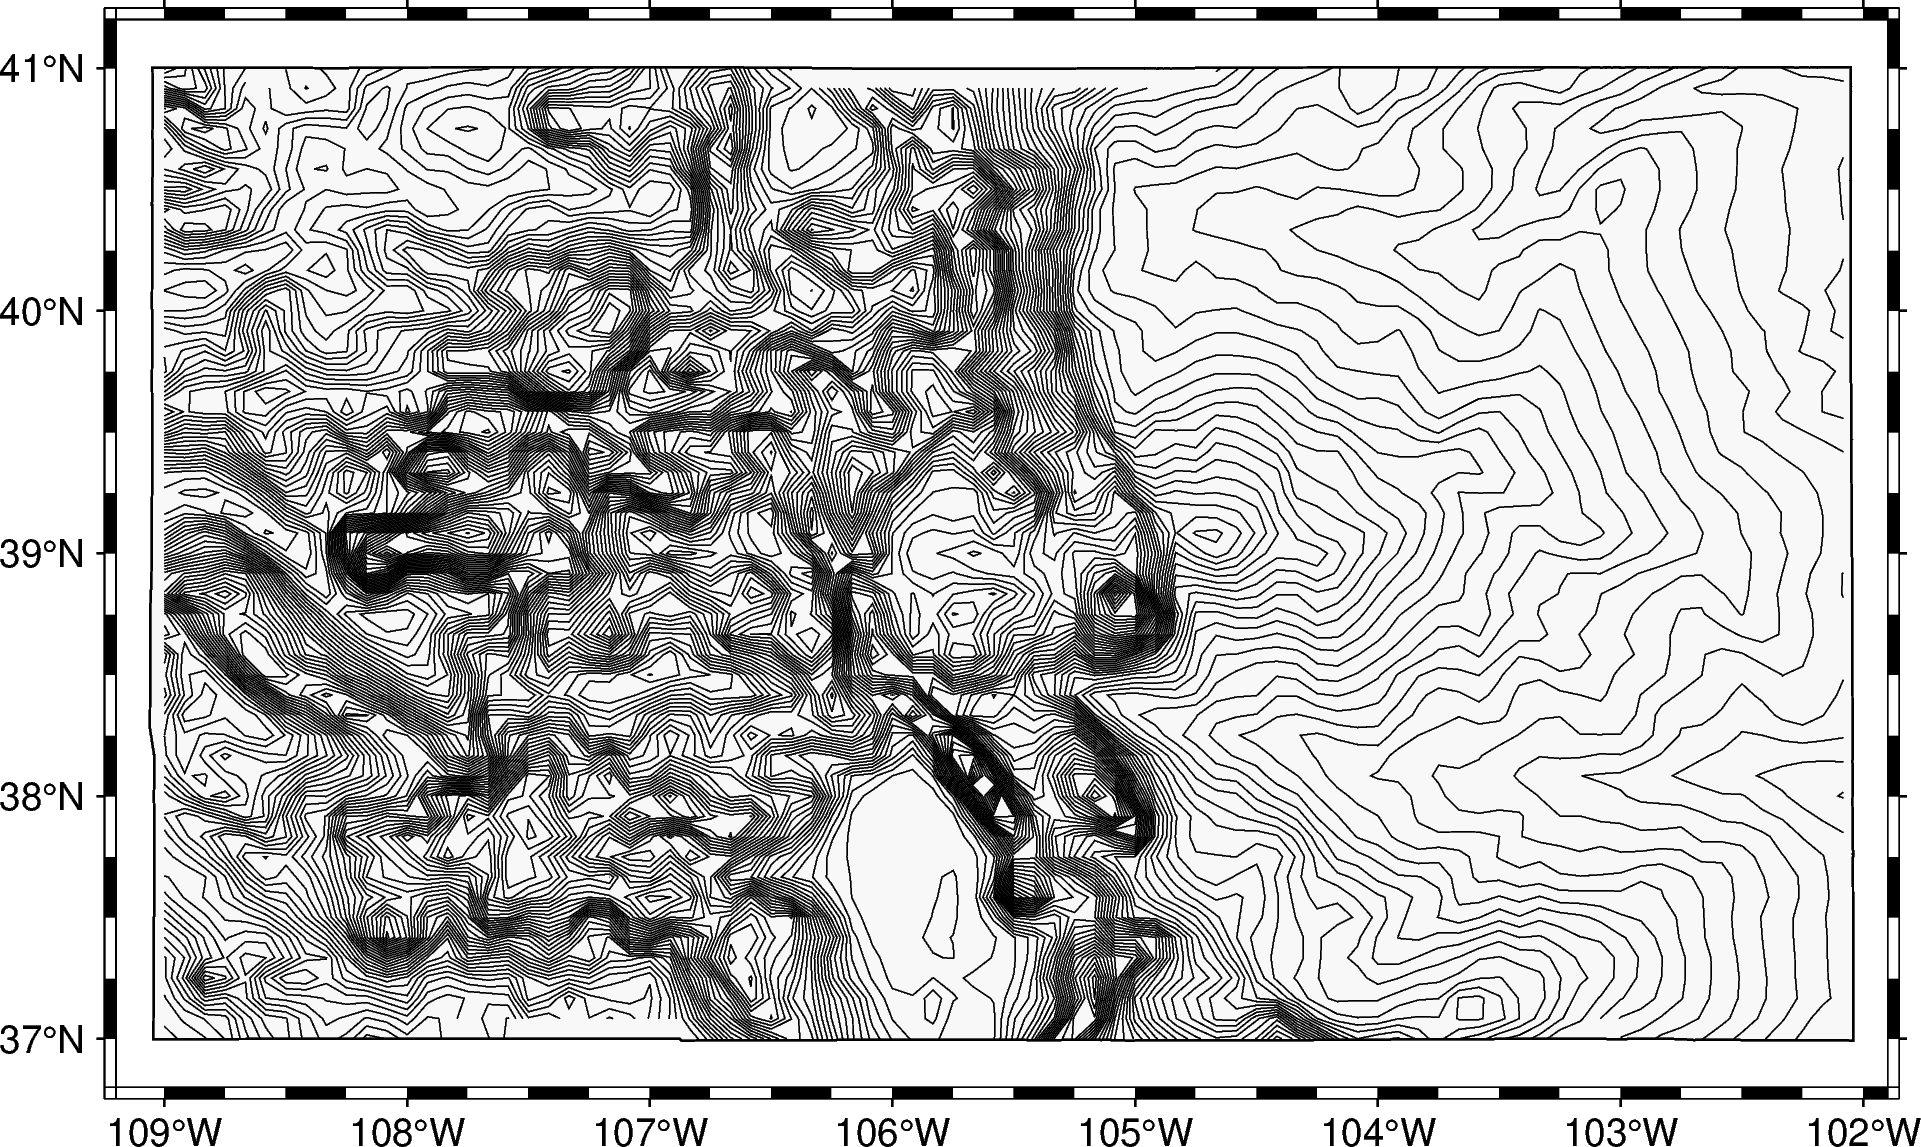

In [11]:
fig = pygmt.Figure()

region = [-109.2, -101.9, 36.8, 41.2]


# Set up the map
fig.coast(
    region=region,
    water="white",
    borders=["1/thick,black"],
    frame="af",
)

# Plot the New York state boundary
fig.plot(data=co_shape, pen="0.5p", region=region, fill="#f8f8f8")


# Add contours (assuming `clipped` is the correct grid file)
fig.grdcontour(clipped, interval=50, region=region)

# Display the figure
fig.show()
